In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [101]:
# import the data:
df = pd.read_csv('heart.csv')

In [102]:
# doing one hot encoding for the categorical features
ohe_sex = pd.get_dummies(df.Sex, prefix='Sex')
ohe_chestpain = pd.get_dummies(df.ChestPainType, prefix='ChestPainType')
ohe_restingecg = pd.get_dummies(df.RestingECG, prefix='RestingECG')
ohe_exerciseangina = pd.get_dummies(df.ExerciseAngina, prefix='ExerciseAngina')
ohe_stslope = pd.get_dummies(df.ST_Slope, prefix='ST_Slope')

In [103]:
# creating our variables to store the data
y = df['HeartDisease']
X = df[['Age', 'RestingBP','FastingBS','MaxHR','Oldpeak', 'Cholesterol']]

C:\Users\winst\anaconda3\envs\introds\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\winst\anaconda3\envs\introds\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


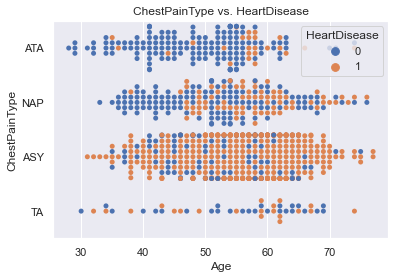

In [104]:
sns.set(style='darkgrid')
plt.title("ChestPainType vs. HeartDisease")
ax = sns.swarmplot(x=df['Age'], y=df['ChestPainType'], hue=df['HeartDisease'])

In [105]:
# adding the encoded features
X['Male'] = ohe_sex['Sex_M']
X['Female'] = ohe_sex['Sex_F']

X['CPT_ASY'] = ohe_chestpain['ChestPainType_ASY']
X['CPT_ATA'] = ohe_chestpain['ChestPainType_ATA']
X['CPT_NAP'] = ohe_chestpain['ChestPainType_NAP']
X['CPT_TA'] = ohe_chestpain['ChestPainType_TA']

X['ECG_LVH'] = ohe_restingecg['RestingECG_LVH']
X['ECG_Normal'] = ohe_restingecg['RestingECG_Normal']
X['ECG_ST'] = ohe_restingecg['RestingECG_ST']

X['EA_N'] = ohe_exerciseangina['ExerciseAngina_N']
X['EA_Y'] = ohe_exerciseangina['ExerciseAngina_Y']

X['ST_Down'] = ohe_stslope['ST_Slope_Down']
X['ST_Flat'] = ohe_stslope['ST_Slope_Flat']
X['ST_Up'] = ohe_stslope['ST_Slope_Up']
X

C:\Windows\Temp/ipykernel_3584/1071061165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Male'] = ohe_sex['Sex_M']
C:\Windows\Temp/ipykernel_3584/1071061165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Female'] = ohe_sex['Sex_F']
C:\Windows\Temp/ipykernel_3584/1071061165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,Cholesterol,Male,Female,CPT_ASY,CPT_ATA,CPT_NAP,CPT_TA,ECG_LVH,ECG_Normal,ECG_ST,EA_N,EA_Y,ST_Down,ST_Flat,ST_Up
0,40,140,0,172,0.0,289,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,0,156,1.0,180,0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,0,98,0.0,283,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,0,108,1.5,214,0,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,0,122,0.0,195,1,0,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,0,132,1.2,264,1,0,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,1,141,3.4,193,1,0,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,0,115,1.2,131,1,0,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,0,174,0.0,236,0,1,0,1,0,0,1,0,0,1,0,0,1,0


In [93]:
# replacing missing cholesterol values with the mean cholesterol
arr = np.array([X['Cholesterol']])
mean = arr[np.nonzero(arr)].mean()
X['Cholesterol'].replace({0: mean}, inplace=True)

# replacing missing restingbp values with the mean restingbp
arr = np.array([X['RestingBP']])
mean = arr[np.nonzero(arr)].mean()
X['RestingBP'].replace({0: mean}, inplace=True)

In [94]:
# scaling the data with StandardScaler()
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
# split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
# doing the logreg
logreg = linear_model.LogisticRegression(C=1e30)
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(X_test)

In [96]:
# doing the svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
svm_pred = clf.predict(X_test)

In [97]:
print ("Logreg predicted number of 1's: " + str(logreg_pred.sum()))
print ("SVM predicted number of 1's: " + str(svm_pred.sum()))
print ("Actual number of 1's: " + str(Y_test.sum()))

print ("Logreg predicted number of 0's: " + str(len(logreg_pred) - logreg_pred.sum()))
print ("SVM predicted number of 0's: " + str(len(svm_pred) - svm_pred.sum()))
print ("Actual number of 0's: " + str(len(Y_test) - Y_test.sum()))

logreg_score = logreg.score(X_test, Y_test)
print ("Logreg score: " + str(logreg_score))
svm_score = clf.score(X_test, Y_test)
print ("SVM score: " + str(svm_score))

Logreg predicted number of 1's: 161
SVM predicted number of 1's: 167
Actual number of 1's: 180
Logreg predicted number of 0's: 142
SVM predicted number of 0's: 136
Actual number of 0's: 123
Logreg score: 0.858085808580858
SVM score: 0.8712871287128713


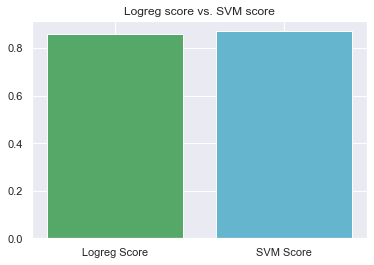

In [98]:
colors = ['g', 'c']
scores = [logreg_score, svm_score]
plt.bar(["Logreg Score", "SVM Score"], scores, color=colors)
plt.title("Logreg score vs. SVM score")
plt.show()